The visibility for alpha = 0.0 is 97.22222222222221 with an uncertainty of  1.233603018006873

The visibility for alpha = 45.0 is 90.67055393586006 with an uncertainty of  2.2773127794667816

The visibility for alpha = 90.0 is 96.7123287671233 with an uncertainty of  1.33110878124459

The visibility for alpha = 135.0 is 85.625 with an uncertainty of  2.88766740586152



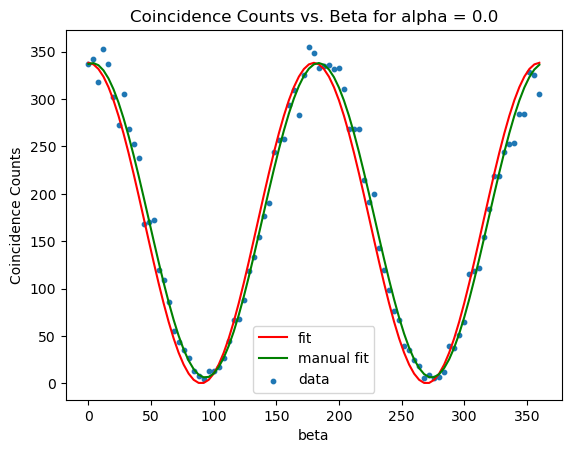

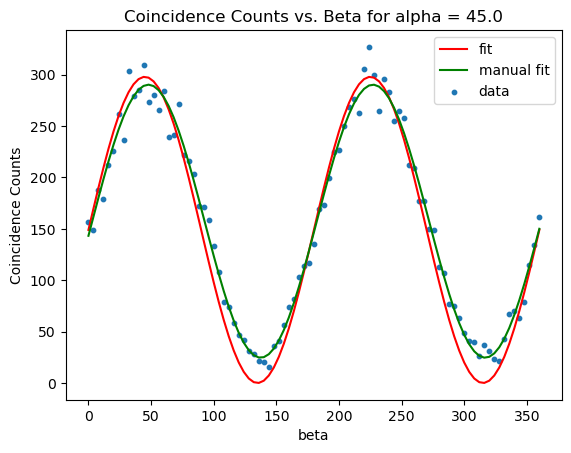

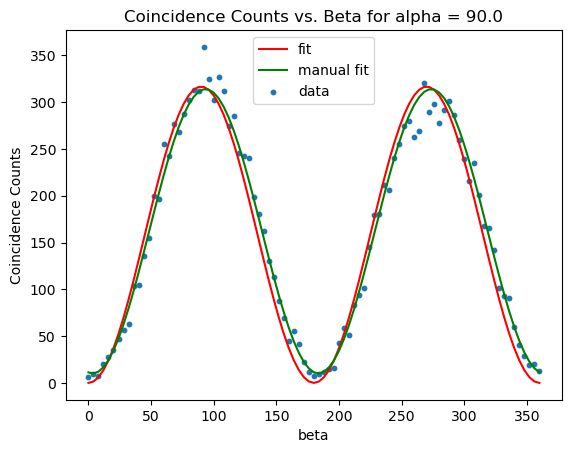

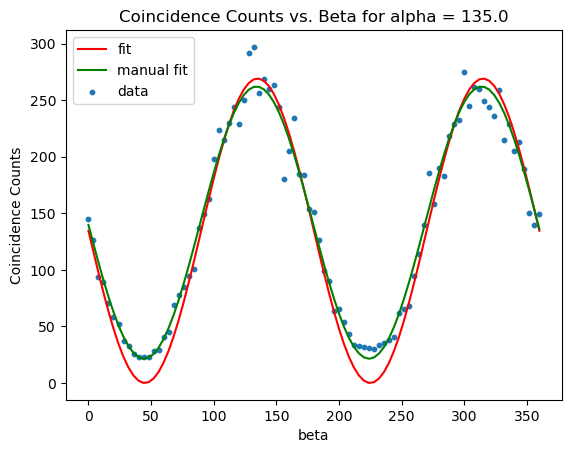

Our visibility for alpha =  0.0  from the manual fit is  96.44964847612853 with an error of 1.6000699111593661

Our visibility for alpha =  45.0  from the manual fit is  84.3615099989232 with an error of 1.6000699111593661

Our visibility for alpha =  90.0  from the manual fit is  93.75904754825417 with an error of 1.6000699111593661

Our visibility for alpha =  135.0  from the manual fit is  84.87653388825132 with an error of 1.6000699111593661

Our different Es are [0.7071067811865476, -0.7071067811865475, 0.7071067811865475, 0.7071067811865475]
We calculate S =  2.82842712474619 with an error of 0.05741809626872659


In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

#-------------------------------------------Reading in Data-----------------------------------------------

dataframe1 = pd.read_csv('Entanglement_Data_P2 - Sheet1.csv')
beta = np.array(dataframe1['Unnamed: 2'].values[1:])
beta = beta.astype(float)


C = []
for name in ['Unnamed: 5', 'Unnamed: 8', 'Unnamed: 11', 'Unnamed: 14']:
    Cnd = np.array(dataframe1[name].values[1:])
    Cnd = Cnd.astype(float)
    C.append(Cnd)

# Now our C array contains the coincidence counts for
# α=0, 45, 90, 135 for C[0], C[1], C[2], C[3] respectively

#--------------------------------Calculating Visibility Manually for Each Angle----------------------------

V = []                   
V_error = []                  
alpha = [0.0, 45., 90., 135.]

for i in range(4): 
    angle = alpha[i]
    C_max = max(C[i])
    C_min = min(C[i])

    dC_max = (2.0 * C_min)/((C_max + C_min)**2)
    dC_min = (2.0 * C_max)/((C_max + C_min)**2)
    DC_max = np.sqrt(C_max)
    DC_min = np.sqrt(C_min)

    Vis = (C_max - C_min)/(C_max + C_min)
    Vis_error = np.sqrt((dC_max * DC_max)**2 + (dC_min * DC_min)**2)
    V.append(Vis)
    V_error.append(DVis)
    print("The visibility for alpha =", angle, "is", Vis * 100., "with an uncertainty of ", Vis_error * 100.)
    print()
    
#---------------------Fitting our Data and Extracting Visibility from the Manual fit-------------------------

N = []                   

def func(beta, N0):
    return 0.5 * N0 * np.cos(np.radians(beta - angle)) ** 2


def manual(beta, A, V_m, beta_c, P):
    return 0.5 * A * (1 - V_m * np.sin(np.radians((beta - beta_c) / P)))

     
A = []
V_m = []
beta_c = []
P = []
V_error_m = []
guess = np.array([1., 1., 1., 1.])

for i in range(4):
    angle = alpha[i]
    popt, pcov = curve_fit(func, beta, C[i])
    N.append(popt[0])
    plt.plot(beta, func(beta, N[i]), label = 'fit', color = 'red')
    
    parameters, cov = curve_fit(manual, beta, C[i], guess)
    A_, V_m_, beta_c_, P_ = parameters
    A.append(A_)
    V_m.append(V_m_)
    beta_c.append(beta_c_)
    P.append(P_)
    V_error = np.sqrt(np.diag(cov))
    V_error_m.append(V_error[1])
    plt.plot(beta, manual(beta, A_, V_m_, beta_c_, P_), label = 'manual fit', color = 'green')
    guess = parameters
    
    plt.scatter(beta, C[i], label = 'data', s=10)
    plt.xlabel('beta')
    plt.ylabel('Coincidence Counts')
    plt.title(f"Coincidence Counts vs. Beta for alpha = " + str(angle))
    plt.legend()
    plt.show()
    
for i in range(4):
    print("Our visibility for alpha = ", alpha[i], " from the manual fit is ", np.abs(V_m[i])*100., "with an error of", V_error[1]*100.)
    print()
    
#-----------------------------------Calculating S for the Bell Inequality-----------------------------------

E = []
E_error = []
n = 0

for angle in [0.0, 45.0]:
    for b in [22.5, 67.5]:
        
        C_ab = func(b, N[n])
        angle += 90.
        C_apb = func(b, N[n])
        b += 90.
        C_apbp = func(b, N[n])
        angle -= 90.
        C_abp = func(b, N[n])

        E_ab = (C_ab - C_abp - C_apb + C_apbp) / (C_ab + C_apbp + C_apb + C_abp)
        E.append(E_ab)
        
        term1 = 2 * ((C_ab + C_apbp)*(C_apb + C_abp)) / ((C_ab + C_apbp + C_apb + C_abp)**2)
        term2 = np.sqrt((1.0 / (C_ab + C_apbp)) + (1.0 / (C_abp + C_apb)))
        error = term1 * term2
        E_error.append(error)
        
        n += 1
        

print("Our different Es are", E)

S = E[0] + E[2] - E[1] + E[3]

for n in range(4):
    E_error[n] = E_error[n] ** 2
    
S_error = np.sqrt(sum(E_error))

print("We calculate S = ", S, "with an error of", S_error)